Chapter 16
# 强连通、弱连通
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import random

In [2]:
# 创建一个包含5个节点的无向完全图
G_undirected = nx.complete_graph(5)

In [3]:
# 创建一个新的有向图
G_directed = nx.DiGraph()

In [4]:
# 为每对节点随机选择方向
random.seed(8)
for u, v in G_undirected.edges():
    if random.choice([True, False]):
        G_directed.add_edge(u, v)
    else:
        G_directed.add_edge(v, u)

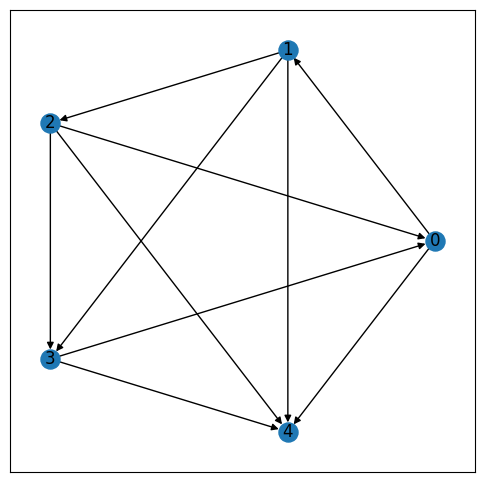

In [5]:
# 可视化图
plt.figure(figsize = (6,6))
pos = nx.circular_layout(G_directed)
nx.draw_networkx(G_directed, 
                 pos = pos,
                 with_labels = True,
                 node_size = 188) 
plt.savefig('完全图，设定边方向.svg')

In [6]:
nx.is_strongly_connected(G_directed)

False

In [7]:
nx.is_weakly_connected(G_directed)

True

In [7]:
list_strongly_cc = sorted(nx.strongly_connected_components(G_directed), key=len, reverse=True)

In [8]:
list(list_strongly_cc)

[{0, 1, 2, 3}, {4}]

In [11]:
# 自定义函数将节点序列转化为边序列 (闭环)

def nodes_2_edges(node_list):
    
    # 使用列表生成式创建边的列表
    list_edges = [(node_list[i], node_list[i+1]) 
                  for i in range(len(node_list)-1)]
    
    # 加上一个额外的边从最后一个节点回到第一个节点，形成闭环
    closing_edge = [(node_list[-1], node_list[0])]
    list_edges = list_edges + closing_edge
    return  list_edges

In [14]:
list_cc = list(list_strongly_cc[0])

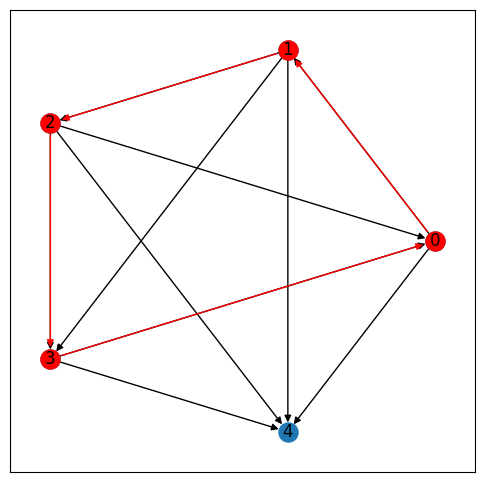

In [17]:
# 可视化图
plt.figure(figsize = (6,6))
edges_strongly_cc = nodes_2_edges(list_cc)

pos_Gcc_idx = {k: pos[k] for k in list_cc}

nx.draw_networkx(G_directed, 
                 pos = pos,
                 with_labels = True,
                 node_size = 188) 

nx.draw_networkx_nodes(G_directed,
                       nodelist = list_cc,
                       pos = pos_Gcc_idx,
                       node_size = 188,
                       node_color = 'r')

nx.draw_networkx_edges(G_directed,
                       pos = pos_Gcc_idx,
                       edgelist = edges_strongly_cc,
                       edge_color = 'r')
    
plt.savefig('强连通分量.svg')

In [ ]:
# 可视化有向图中3个环

fig, axes = plt.subplots(1, 3, figsize = (9,3))

axes = axes.flatten()

for nodes_i, ax_i in zip(list_cycles, axes):
    
    edges_i = nodes_2_edges(nodes_i)
    
    nx.draw_networkx(G_directed, 
                     ax = ax_i,
                     pos = pos,
                     with_labels = True,
                     node_size = 88) 
    
    nx.draw_networkx_nodes(G_directed,
                           ax = ax_i,
                           nodelist = nodes_i,
                           pos = pos,
                           node_size = 88,
                           node_color = 'r')

    nx.draw_networkx_edges(G_directed,
                           pos = pos,
                           ax = ax_i,
                           edgelist = edges_i,
                           edge_color = 'r')
        
    ax_i.set_title(' → '.join(str(node) for node in nodes_i))
    ax_i.axis('off')
    
plt.savefig('有向图中所有cycles.svg')  

In [12]:
largest = max(list_strongly_cc, key=len)
largest

{0, 1, 2, 3}

In [ ]:
G_directed_2 = nx.complete_graph(5, create_using = nx.DiGraph())

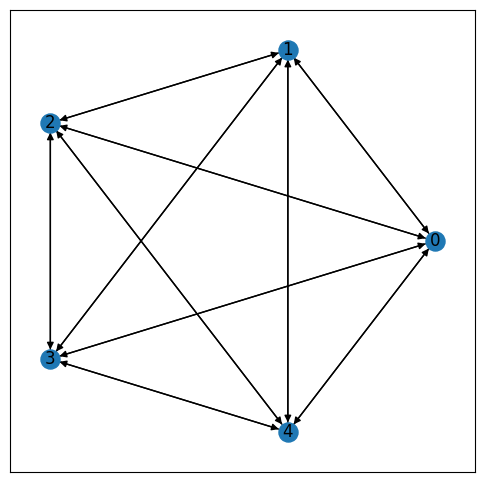

In [9]:
# 可视化图
plt.figure(figsize = (6,6))
nx.draw_networkx(G_directed_2, 
                 pos = pos,
                 with_labels = True,
                 node_size = 188) 
plt.savefig('完全图，设定边方向.svg')

In [11]:
nx.is_strongly_connected(G_directed_2)

True